In [33]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.circuit.library import EfficientSU2

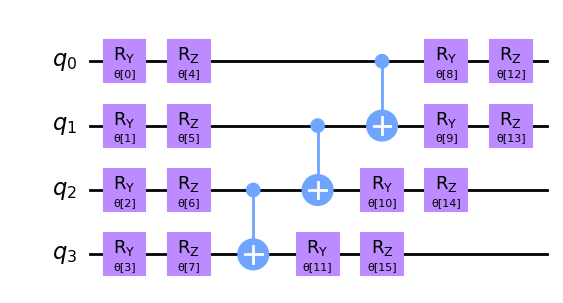

In [34]:
# build a parameterized qc
qc = EfficientSU2(4, reps=1)
qc = qc.decompose()
dag = circuit_to_dag(qc)
qc.draw('mpl')

In [35]:
# get the parameters
qc.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15])])

In [36]:
# get the parameter table
qc._parameter_table

ParameterTable({ParameterVectorElement(θ[0]): ParameterReferences([(Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[0])]), 0)]), ParameterVectorElement(θ[4]): ParameterReferences([(Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[4])]), 0)]), ParameterVectorElement(θ[1]): ParameterReferences([(Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[1])]), 0)]), ParameterVectorElement(θ[5]): ParameterReferences([(Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[5])]), 0)]), ParameterVectorElement(θ[2]): ParameterReferences([(Instruction(name='ry', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[2])]), 0)]), ParameterVectorElement(θ[6]): ParameterReferences([(Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[6])]), 0)]), ParameterVectorElement(θ[3]): ParameterReferences([(Instruction(name='ry', num_qubits=1, n

In [37]:
for param in dag.parameters:
    dag._assign_parameter(param, 0)

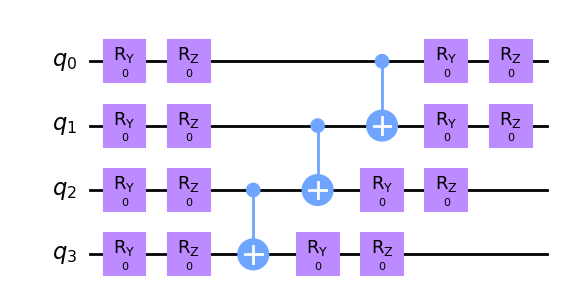

In [38]:
# convert back and see the parameters have been assigned
qc = dag_to_circuit(dag)
qc.draw('mpl')

In [17]:
from qiskit.quantum_info import Operator
from qiskit.transpiler.passes import BasisTranslator
# from unittest  import assertEqual, assertTrue
from qiskit.circuit.library.standard_gates.equivalence_library import (
StandardEquivalenceLibrary as std_eqlib,
)
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.converters import circuit_to_dag, dag_to_circuit
import numpy as np
pi = np.pi


bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

in_dag = circuit_to_dag(bell)
out_dag = BasisTranslator(std_eqlib, ["ecr", "u"]).run(in_dag)

#         ┌────────────┐   ┌─────────────┐┌──────┐┌──────────┐
# q_0: ───┤ U(π/2,0,π) ├───┤ U(0,0,-π/2) ├┤0     ├┤ U(π,0,π) ├
#      ┌──┴────────────┴──┐└─────────────┘│  Ecr │└──────────┘
# q_1: ┤ U(-π/2,-π/2,π/2) ├───────────────┤1     ├────────────
#      └──────────────────┘               └──────┘

qr = QuantumRegister(2, "q")
expected = QuantumCircuit(2)
expected.u(pi / 2, 0, pi, qr[0])
expected.u(0, 0, -pi / 2, qr[0])
expected.u(-pi / 2, -pi / 2, pi / 2, qr[1])
expected.ecr(0, 1)
expected.u(pi, 0, pi, qr[0])
expected_dag = circuit_to_dag(expected)

# self.assertEqual(out_dag, expected_dag)
assert out_dag == expected_dag

HERE
HERE


In [23]:
expected_dag._parameters

[]

In [24]:
out_dag._parameters

[]